In [1]:
import sys
from os import listdir
from os.path import isfile, join
import string

import numpy as np
from plot_utils import plot_solution
from plot_utils import plot_two_solutions
import matplotlib.pyplot as plt 

from ioutils import parse_input
from ioutils import parse_solutions
from utils import get_distance_matrix
from utils import get_discount_matrix
from utils import get_nodes
from utils import allocate_paths
from utils import get_flow_from_paths
from utils import bitmap
from utils import plot_comparison_with_optimal

In [2]:
DATASET = 'AP'
INPUT_DIRECTORY = f"./data/{DATASET}/"

In [3]:
files = [join(INPUT_DIRECTORY, f) for f in listdir(INPUT_DIRECTORY) if isfile(join(INPUT_DIRECTORY, f))]
print(files)
file = files[1]
print(file)

['./data/AP/10.3', './data/AP/20.3', './data/AP/50.3', './data/AP/10.2', './data/AP/ReadMe-UMApHMP.txt', './data/AP/5.3', './data/AP/25.3', './data/AP/10.5', './data/AP/100.3', './data/AP/200.3', './data/AP/10.4', './data/AP/40.3', './data/AP/Solutions-UMApHMP.txt']
./data/AP/20.3


In [4]:
n, p, alpha, delta, ksi, nodes_coordinates, demand = parse_input(file, DATASET)
distances = get_distance_matrix(nodes_coordinates)

In [5]:
distances

array([[    0.        , 11573.6804493 , 18163.41170377, 36817.92425552,
        15640.17759867, 17506.4238419 , 22977.07570613, 32193.63529793,
        20952.58621558, 25387.06249909, 29774.37942534, 36858.08103976,
        26751.9221342 , 32128.15046231, 32804.23288398, 37925.07734583,
        32953.05348135, 34220.36697595, 35513.38688902, 37877.78347835],
       [11573.6804493 ,     0.        , 10075.24990899, 26434.76739805,
        20170.35646073, 15388.68554391, 18942.30032274, 26082.03981578,
        25120.78495599, 24313.43781012, 26951.78001601, 31700.07060831,
        30086.01895736, 33114.81170351, 32450.79758828, 34167.91404331,
        39186.63329374, 36810.53215445, 35922.96467127, 37001.73116022],
       [18163.41170377, 10075.24990899,     0.        , 19050.7086314 ,
        18041.53142425,  9062.01616415, 10002.39913224, 16019.94519935,
        21546.26109725, 16665.24144497, 17959.95376992, 21718.68651472,
        25096.24411639, 26051.59357329, 24542.4715418 , 24508.

In [6]:
def get_initial_solution(n, p, distances):
    """Get initial solution method for vns.

    Paramteres: 
    n (int): Number of nodes
    p (int): Number of hubs
    distances (matrix): distance matrix for the graph

    Returns:
    (list): hubs

    Notes:
    This initialization method is taken from the paper
    El-Ghazali Talbi, Raca Todosijevic, 'The robust uncapacitated multiple allocation p-hub median problem' 

    "A solution built in a greedy manner. 
    Namely, the initial p hubs are chosen as those whose maximum transportation cost
    to any other node are the p smallest. More precisely, 
    let g(p) be the maximum transportation cost of a node h to any other node, 
    i.e. g(h) = max{C_ih|i from N, i != h}, h from N.
    Then, the nodes with the p smallest values of function g are taken as the initial p hubs."
    """
    nodes = get_nodes(n)
    longest_edge_from_node = {}
    for node in nodes:
        longest_edge_from_node[node] = max(distances[node])
    hubs = sorted(longest_edge_from_node, key=longest_edge_from_node.get)[:p]
    return hubs

In [7]:
hubs = get_initial_solution(n, p, distances)
hubs

[5, 9, 6]

In [8]:
discounts = get_discount_matrix(n, hubs, alpha, delta, ksi)
paths = allocate_paths(n, hubs, distances, discounts)

In [9]:
flow = get_flow_from_paths(n, paths, demand)

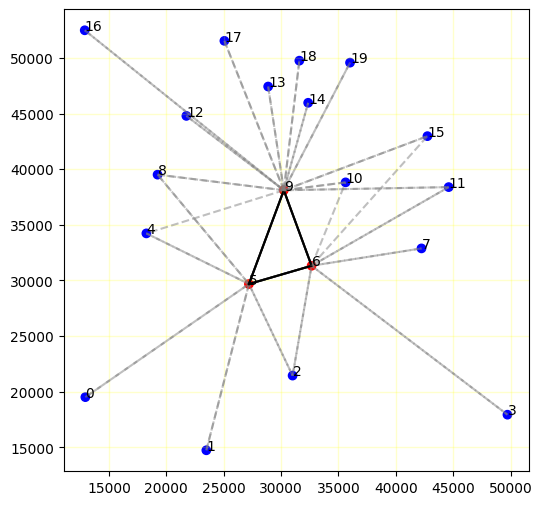

In [10]:
plot_solution(nodes_coordinates, bitmap(n, hubs), flow, point_labels='numbers', plot_all_lines=False, verbose=0)

##### Let's plot initial solution and optimal solution for several instances to observe how close is initial solution to optimal

In [11]:
from os import listdir
from os.path import isfile

In [12]:
DATASET = 'AP'
INPUT_DIRECTORY = f"./data/{DATASET}/"
SOLUTIONS_FILE = '/home/ubuntu/VNS_for_UMApHMP/data/AP/Solutions-UMApHMP.txt'

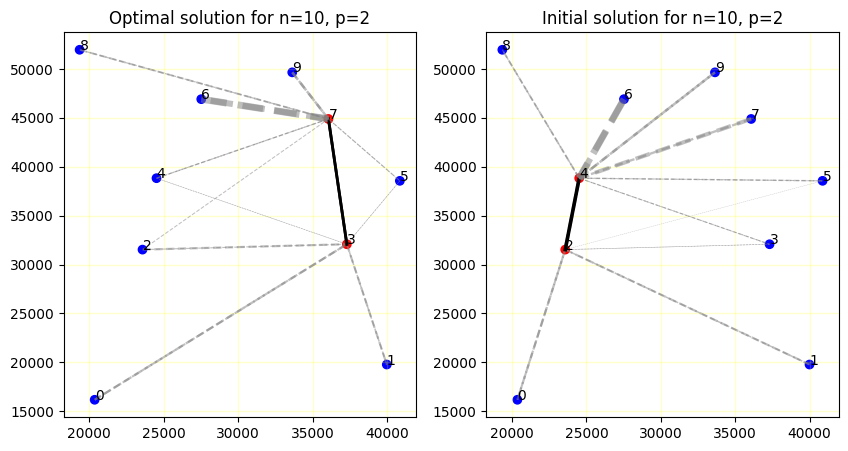

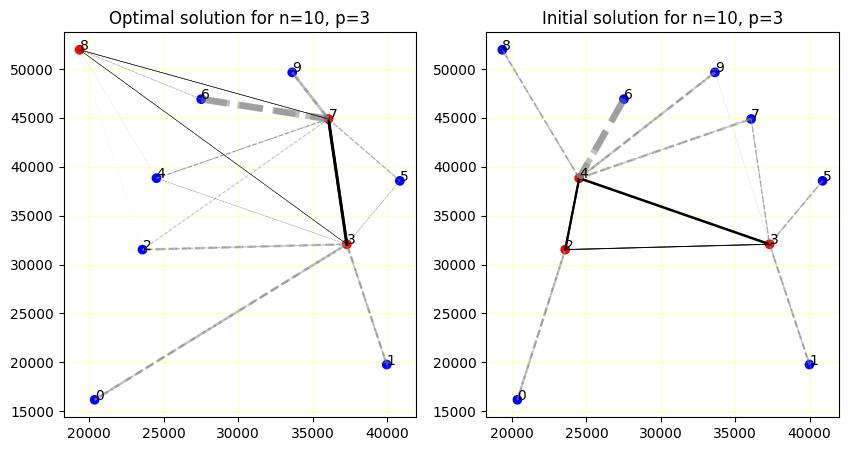

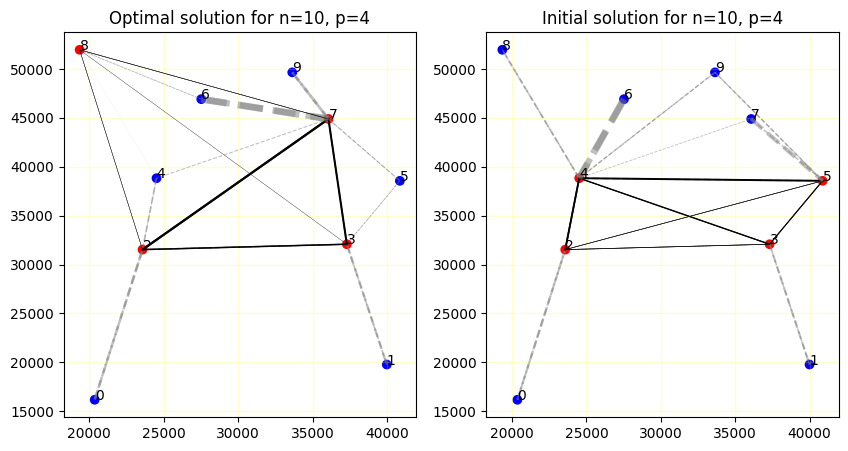

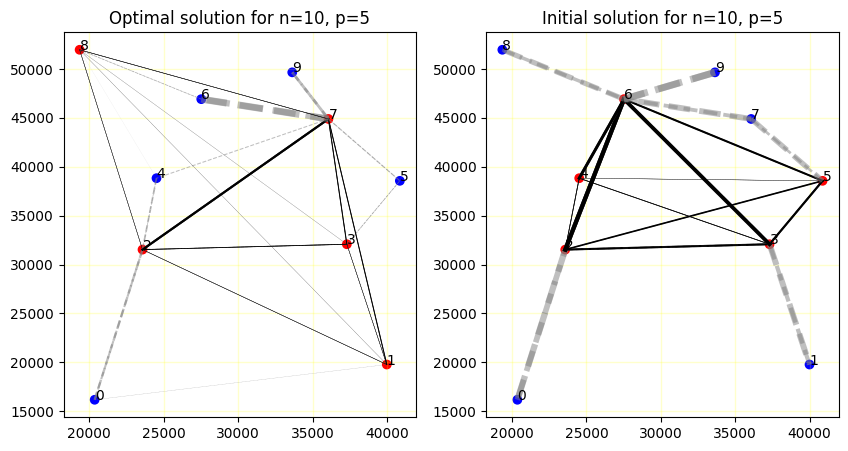

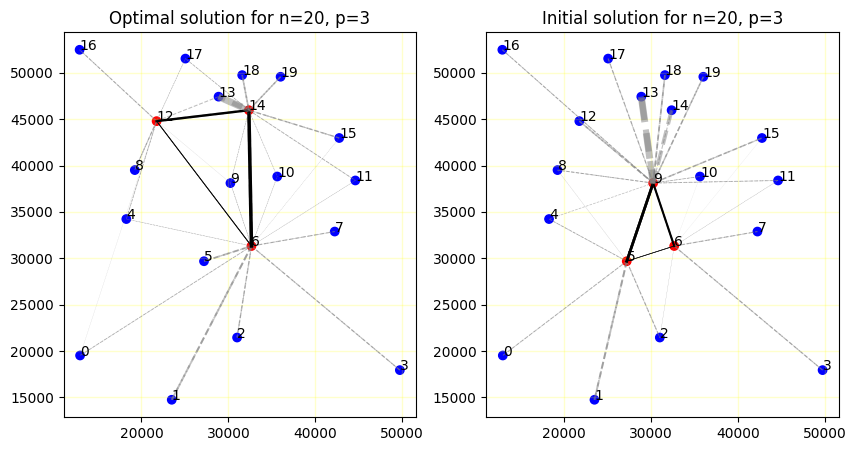

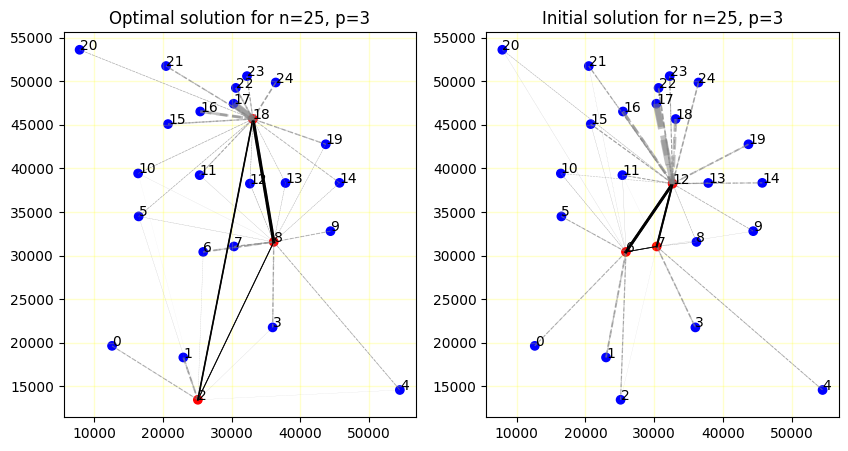

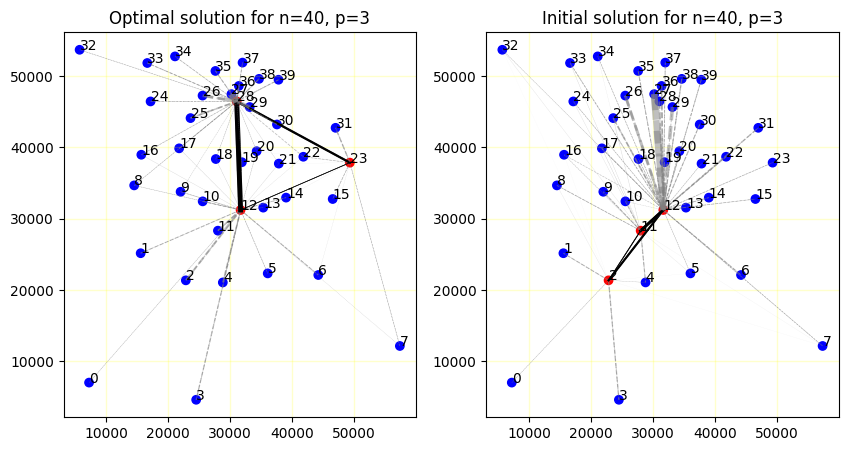

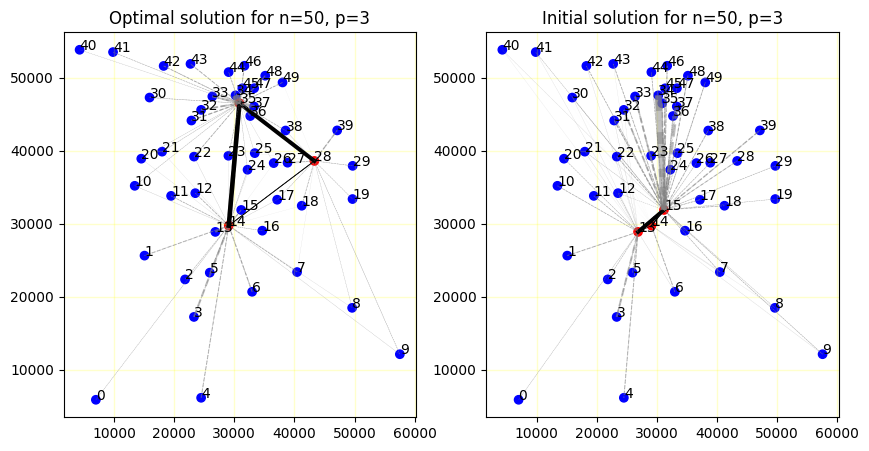

In [13]:
plot_comparison_with_optimal(INPUT_DIRECTORY, SOLUTIONS_FILE, DATASET, get_initial_solution)

We can see that initialization function tends to choose central nodes for hubs, while optimal hubs are more spread across the network.

So let's maybe take not p minimum but p median

In [14]:
def get_initial_solution_2(n, p, distances):
    """Get initial solution method for vns.

    Paramteres: 
    n (int): Number of nodes
    p (int): Number of hubs
    distances (matrix): distance matrix for the graph

    Returns:
    (list): hubs

    Notes:
    This is modification of get_initial_solution. We are taking p medain values of functon g.
    """
    nodes = get_nodes(n)
    longest_edge_from_node = {}
    for node in nodes:
        longest_edge_from_node[node] = max(distances[node])
    most_left_hub = int((n-p)/2)
    # if any of n or p are even
    if (n+p) % 2 == 0:
        most_left_hub -= 1
    most_right_hub = int((n+p-1)/2)
    hubs = sorted(longest_edge_from_node, key=longest_edge_from_node.get)[most_left_hub:most_right_hub]
    return hubs

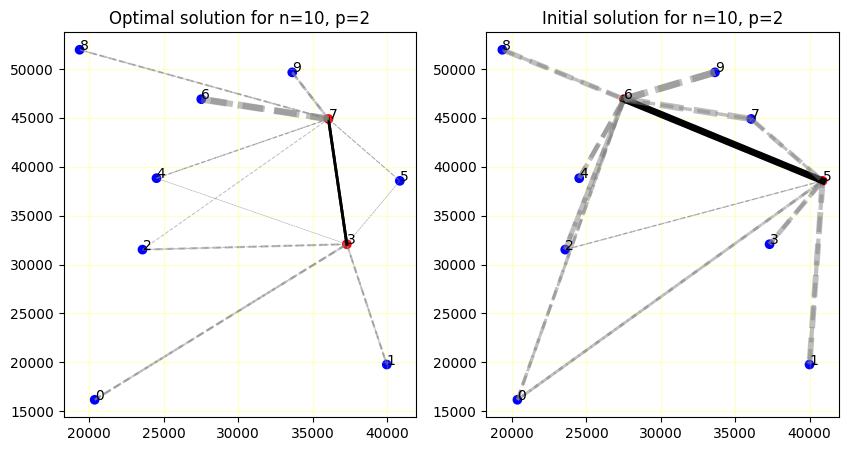

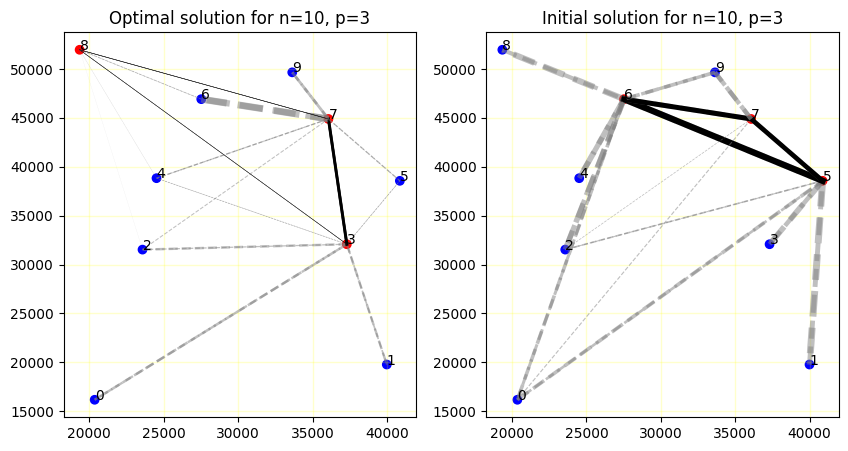

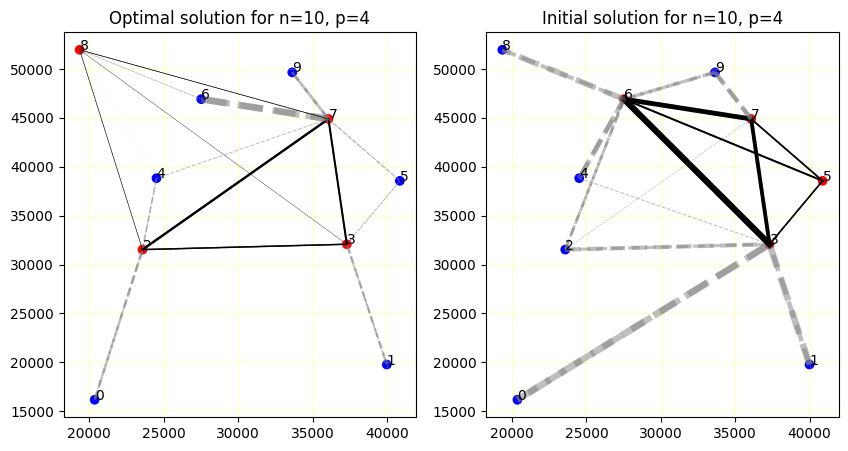

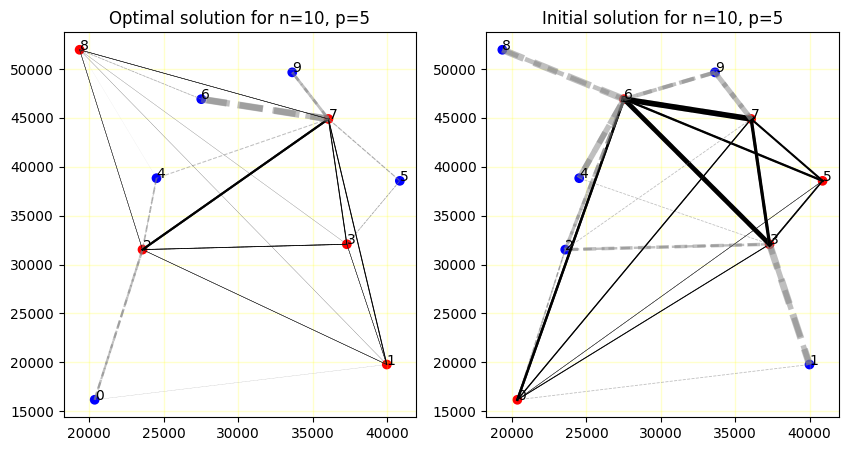

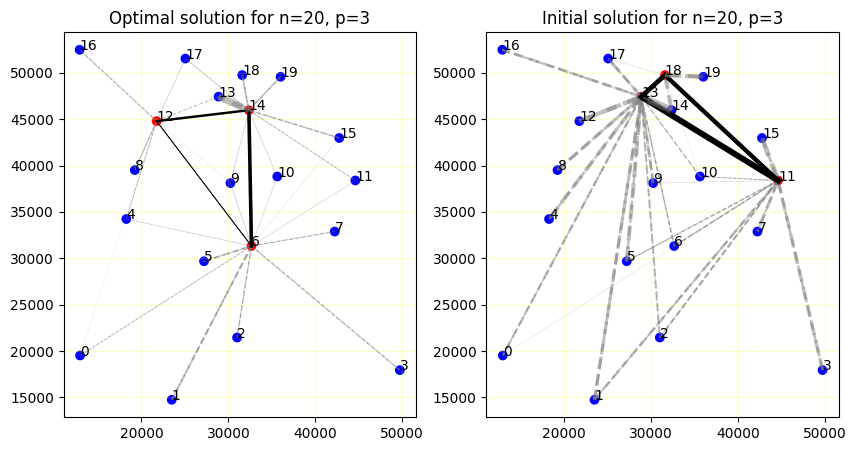

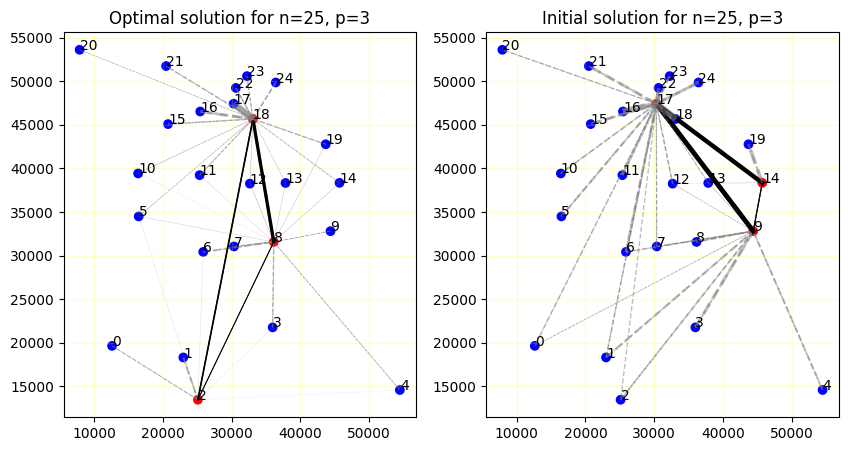

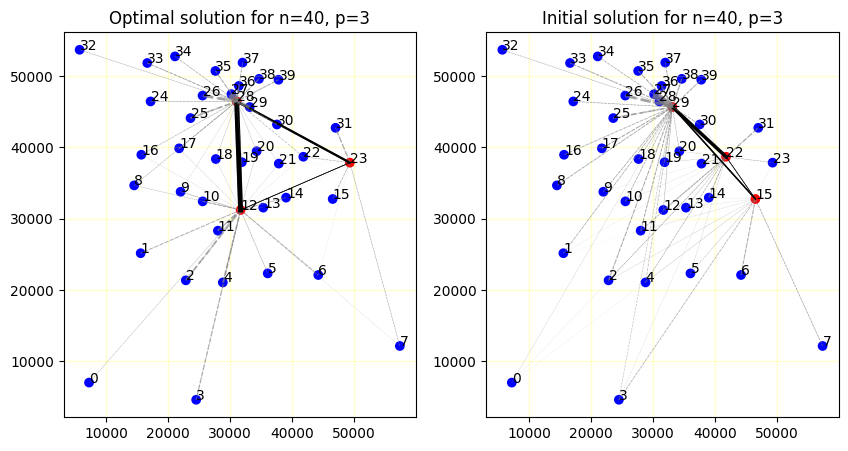

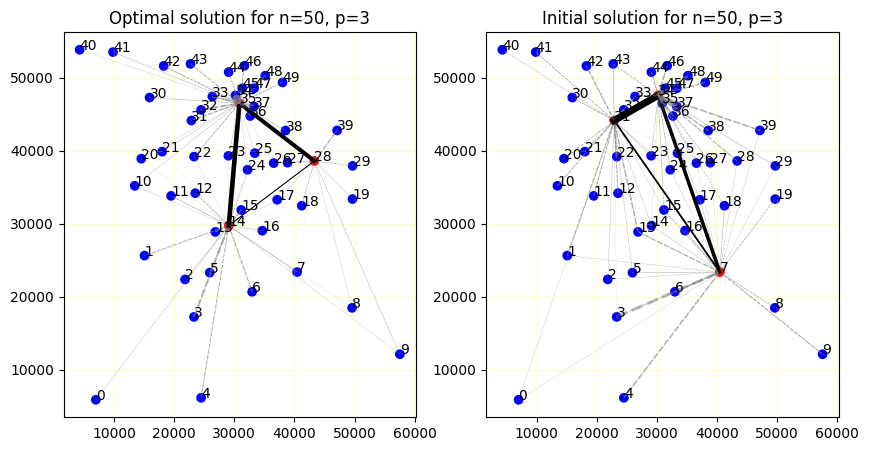

In [15]:
plot_comparison_with_optimal(INPUT_DIRECTORY, SOLUTIONS_FILE, DATASET, get_initial_solution_2)